In [13]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline
import seaborn as sns


The Fiscally Standardized Cities (FiSC) database makes it possible to compare cities based on their revenues, expenditures, debt, and assets. To better understand compliance and tax behavior
across cities we can use city segmentation that can provide useful insights regarding finance strategy making.

In [2]:
import pandas as pd
city_df = pd.read_csv("fisc_full_dataset_2016_update.csv")
city_df.head()

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,cash_other_offsets,cash_other_bonds,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt
0,1977,AK: Anchorage,22002001.0,174500,3.960511,5230.80,4853.52,2103.95,273.49,1830.46,...,174.78,771.49,676.90,NaN,NaN,NaN,4.0,36855.0,NaN,1.0
1,1978,AK: Anchorage,22002001.0,177000,3.681089,5824.90,5375.53,2416.62,394.83,2021.79,...,183.62,1366.70,1133.86,NaN,NaN,NaN,4.0,36804.0,NaN,1.0
2,1979,AK: Anchorage,22002001.0,179600,3.305882,6030.22,5626.77,2519.67,486.61,2033.06,...,243.84,1774.24,1287.20,NaN,NaN,NaN,4.0,36757.0,NaN,1.0
3,1980,AK: Anchorage,22002001.0,178800,2.912706,5536.98,5102.07,2265.36,363.71,1901.65,...,966.15,1302.96,1539.86,NaN,NaN,NaN,4.0,36008.0,NaN,1.0
4,1981,AK: Anchorage,22002001.0,174431,2.640341,6063.65,5617.14,2713.62,331.69,2381.92,...,956.94,1517.18,1634.72,NaN,NaN,NaN,4.0,34557.0,NaN,1.0


### Load Data From CSV File  
Now I upload and read the data

In [33]:
df = city_df.drop('city_name', axis=1)
df.head()

,year,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,own_source_rev_city,...,cash_other_offsets,cash_other_bonds,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt
0,1977,22002001.0,174500,3.960511,5230.80,4853.52,2103.95,273.49,1830.46,2749.57,...,174.78,771.49,676.90,NaN,NaN,NaN,4.0,36855.0,NaN,1.0
1,1978,22002001.0,177000,3.681089,5824.90,5375.53,2416.62,394.83,2021.79,2958.91,...,183.62,1366.70,1133.86,NaN,NaN,NaN,4.0,36804.0,NaN,1.0
2,1979,22002001.0,179600,3.305882,6030.22,5626.77,2519.67,486.61,2033.06,3107.11,...,243.84,1774.24,1287.20,NaN,NaN,NaN,4.0,36757.0,NaN,1.0
3,1980,22002001.0,178800,2.912706,5536.98,5102.07,2265.36,363.71,1901.65,2836.71,...,966.15,1302.96,1539.86,NaN,NaN,NaN,4.0,36008.0,NaN,1.0
4,1981,22002001.0,174431,2.640341,6063.65,5617.14,2713.62,331.69,2381.92,2903.53,...,956.94,1517.18,1634.72,NaN,NaN,NaN,4.0,34557.0,NaN,1.0


<h2 id="pre_processing">Pre-processing</h2

As we can see, city name and county name in this dataset are categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, I need to drop this feature and run clustering.

In [4]:
df = df.drop('county_name', axis=1)
df.head()

,year,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,own_source_rev_city,...,cash_other,cash_other_offsets,cash_other_bonds,cash_other_other,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt
0,1977,22002001.0,174500,3.960511,5230.80,4853.52,2103.95,273.49,1830.46,2749.57,...,1623.17,174.78,771.49,676.90,NaN,NaN,4.0,36855.0,NaN,1.0
1,1978,22002001.0,177000,3.681089,5824.90,5375.53,2416.62,394.83,2021.79,2958.91,...,2684.18,183.62,1366.70,1133.86,NaN,NaN,4.0,36804.0,NaN,1.0
2,1979,22002001.0,179600,3.305882,6030.22,5626.77,2519.67,486.61,2033.06,3107.11,...,3305.27,243.84,1774.24,1287.20,NaN,NaN,4.0,36757.0,NaN,1.0
3,1980,22002001.0,178800,2.912706,5536.98,5102.07,2265.36,363.71,1901.65,2836.71,...,3808.97,966.15,1302.96,1539.86,NaN,NaN,4.0,36008.0,NaN,1.0
4,1981,22002001.0,174431,2.640341,6063.65,5617.14,2713.62,331.69,2381.92,2903.53,...,4108.85,956.94,1517.18,1634.72,NaN,NaN,4.0,34557.0,NaN,1.0


In [15]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.252576  , -0.39090017,  2.9951531 , ..., -0.69008911,
         2.23668902, -0.0642675 ],
       [-1.252576  , -0.38674562,  2.61617726, ..., -0.69008911,
         2.23668902, -0.0642675 ],
       [-1.252576  , -0.38242489,  2.10728967, ..., -0.69008911,
         2.23668902, -0.0642675 ],
       ...,
       [ 1.91000601, -0.55112453, -1.00303373, ..., -0.26900128,
        -0.44708942, -1.80029329],
       [ 1.91000601, -0.5524839 , -1.02014326, ..., -0.26900128,
        -0.44708942, -1.80029329],
       [ 1.91010336,  0.61200809,  2.9951531 , ..., -0.69008911,
        -0.44708942, -0.0642675 ]])

#### Normalizing over the standard deviation
Now I need to normalize the dataset. Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. I use __StandardScaler()__ to normalize our dataset.

In [16]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 ... 2 2 1]


<h2 id="modeling">Modeling</h2>

Now, I apply k-means on our dataset, and take a look at cluster labels.

In [17]:
df["Clus_km"] = labels
df.head(5)

,year,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,own_source_rev_city,...,cash_other_offsets,cash_other_bonds,cash_other_other,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt,Clus_km
0,1977,22002001.0,174500,3.960511,5230.80,4853.52,2103.95,273.49,1830.46,2749.57,...,174.78,771.49,676.90,NaN,NaN,4.0,36855.0,NaN,1.0,1
1,1978,22002001.0,177000,3.681089,5824.90,5375.53,2416.62,394.83,2021.79,2958.91,...,183.62,1366.70,1133.86,NaN,NaN,4.0,36804.0,NaN,1.0,1
2,1979,22002001.0,179600,3.305882,6030.22,5626.77,2519.67,486.61,2033.06,3107.11,...,243.84,1774.24,1287.20,NaN,NaN,4.0,36757.0,NaN,1.0,1
3,1980,22002001.0,178800,2.912706,5536.98,5102.07,2265.36,363.71,1901.65,2836.71,...,966.15,1302.96,1539.86,NaN,NaN,4.0,36008.0,NaN,1.0,1
4,1981,22002001.0,174431,2.640341,6063.65,5617.14,2713.62,331.69,2381.92,2903.53,...,956.94,1517.18,1634.72,NaN,NaN,4.0,34557.0,NaN,1.0,1


<h2 id="insights">Insights</h2>
I assign the labels to each row in dataframe.

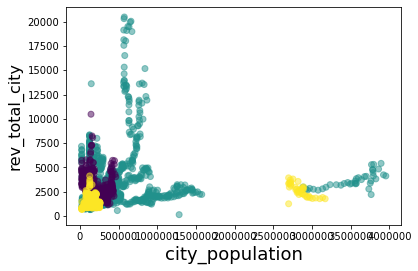

In [38]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 1], X[:, 3], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('city_population', fontsize=18)
plt.ylabel('rev_total_city', fontsize=16)

plt.show()


In [19]:
df.groupby('Clus_km').mean()

,year,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,own_source_rev_city,...,cash_other,cash_other_offsets,cash_other_bonds,cash_other_other,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt
Clus_km,,,,,,,,,,,,,,,,,,,,,
0,1996.500000,9.902611e+07,212360.597500,1.751138,2954.058875,1907.501575,303.655925,147.342575,156.313300,1603.845700,...,5336.068175,1807.344375,867.020675,2661.702950,9.802613e+07,9.825232e+05,2.105000,29249.540201,1.376884,0.000000
1,1996.486468,5.152597e+07,448776.678001,1.752671,3086.566329,2545.756509,739.465094,254.394552,485.070493,1806.291367,...,3760.053243,1106.787993,656.778174,1996.487181,4.295033e+07,1.654590e+06,2.771429,68514.736111,4.944828,0.257143
2,1996.500000,1.470321e+08,480570.237500,1.751138,1653.746531,1469.662188,387.812875,164.995656,222.816906,1081.849469,...,2268.399219,662.096375,361.895844,1244.407625,1.460322e+08,9.239412e+05,2.750000,70966.109375,2.496875,0.000000


The above table shows the centroid values by averaging the features in each cluster.

In [28]:
X[:, 3]

array([5230.8 , 5824.9 , 6030.22, ..., 1898.8 , 1901.73, 1581.06])

Now, we can take a  look at the distribution of cities based on their population and total revenue.

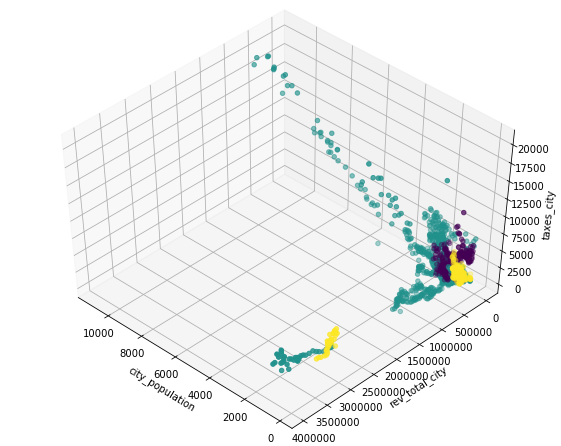

In [39]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('city_population')
ax.set_ylabel('rev_total_city')
ax.set_zlabel('taxes_city')

ax.scatter(X[:, 9], X[:, 1], X[:, 3], c= labels.astype(np.float))


Here, we can also have a 3D look at the distribution of cities based on their population, total revenue, and taxes thay pay.